In [27]:
import json
from datetime import datetime
import matplotlib.pyplot as plt


#use ggplot style
plt.style.use('ggplot')

In [33]:
#data_path = "../data/data_dumps/data_dump_20240501-20240531.json"
#data_path = "../data/hashtags/stitch/vertices/sources/anime.json"
#data_path = "../data/non-hashtags/gb_20240531_20240531.json"
#data_path = "../data/non-hashtags/gb_20240530_20240530.json"
#data_path = "../data/data_dumps/data_dump_20240531-20240531.json"
data_path = "../data/non-hashtags/20240531_20240531_region-gb.json"

with open(data_path, 'r') as f:
    data = json.load(f)

In [34]:
len(data)

25076

In [30]:
times = []

from datetime import datetime, timezone

for i in data:
    unixtime = i["create_time"]
    utc_time = datetime.fromtimestamp(unixtime, tz=timezone.utc)
    times.append(utc_time)

months = [i.month for i in times]
days = [i.day for i in times]

#count the number of times each month appears
month_counts = {}
for i in months:
    if i in month_counts:
        month_counts[i] += 1
    else:
        month_counts[i] = 1

#count the number of times each day appears
day_counts = {}
for i in days:
    if i in day_counts:
        day_counts[i] += 1
    else:
        day_counts[i] = 1

weekends = [i.day for i in times if i.month == 5 and i.weekday() >= 5]  # Saturday (5) and Sunday (6)


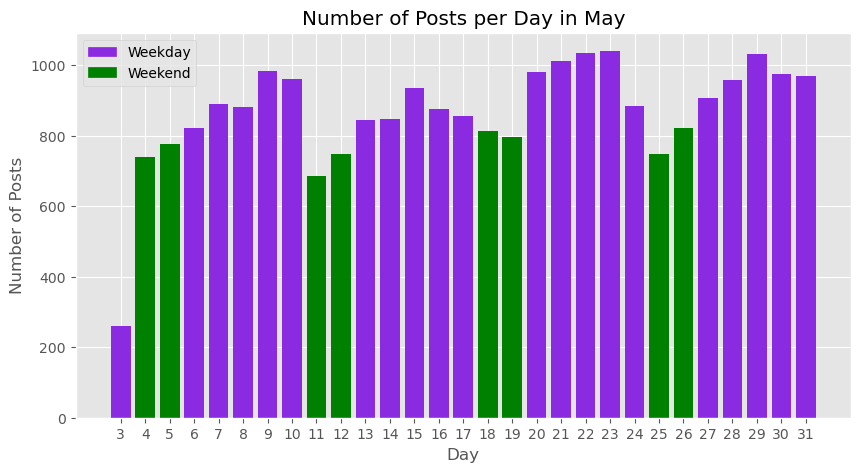

In [32]:
plt.figure(figsize=(10, 5))

# Use a different color for weekends
colors = ['green' if day in weekends else 'blueviolet' for day in day_counts.keys()]

plt.bar(day_counts.keys(), day_counts.values(), color=colors)
plt.xlabel("Day")   
plt.ylabel("Number of Posts")
plt.title("Number of Posts per Day in May")
plt.xticks(list(day_counts.keys()))

# Add a legend
plt.legend(handles=[plt.Rectangle((0, 0), 1, 1, color='blueviolet', label='Weekday'),
                    plt.Rectangle((0, 0), 1, 1, color='green', label='Weekend')])

plt.show()